<center><h1>Jaggi_Yashh_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

<center><font size="4">Name: Yashh Jaggi</font></center>
<center><font size="4">Github Username: yashhjaggi1998</font></center>
<center><font size="4">USCID: 4591043656</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
from scipy.io.arff import loadarff
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix, DistanceMetric

import math
import numpy as np

Get the Vertebral Column Data Set

In [2]:
raw_data = loadarff('../data/vertebral_column_data/column_2C_weka.arff')

#Normal is class 0
#Abnormal is class 1
df = pd.DataFrame(raw_data[0])
df['class'] = df['class'].str.decode('utf-8') 
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

Text(0.5, 1.02, 'Scatter Plot of all independent variables: Pairwise')

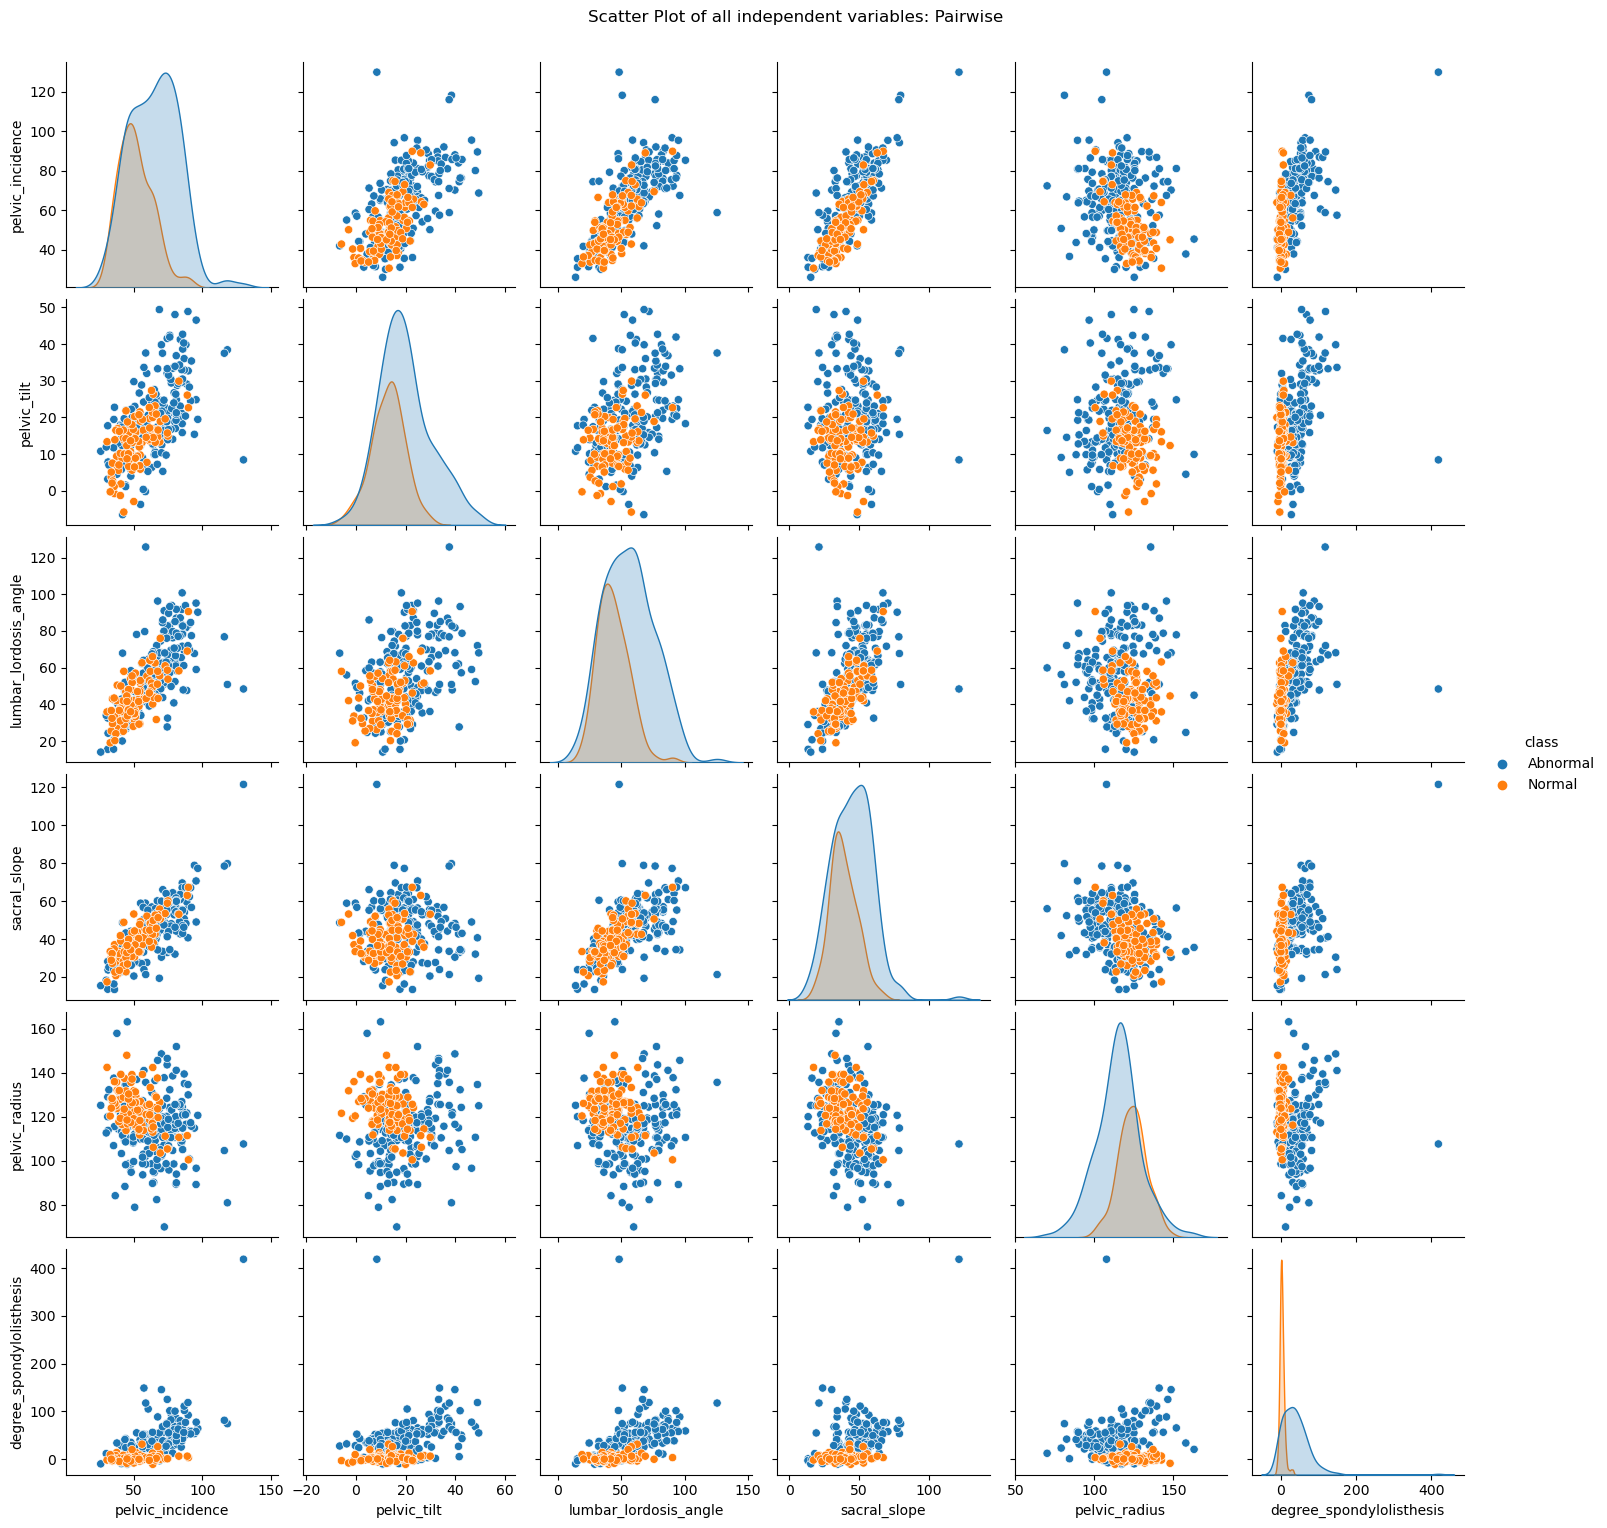

In [3]:
plot = sb.pairplot(df, hue="class")
plot.fig.suptitle("Scatter Plot of all independent variables: Pairwise", y=1.02)

#### ii. Boxplots

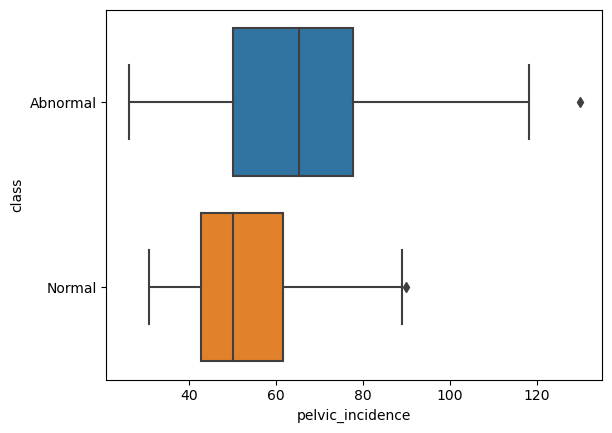

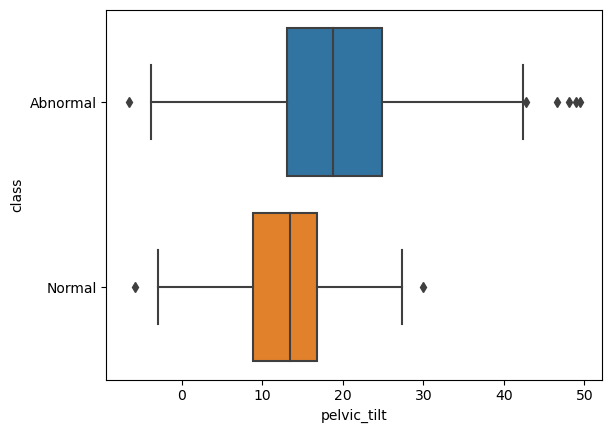

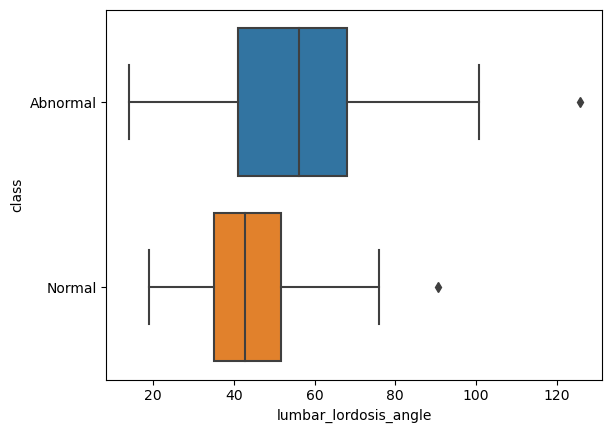

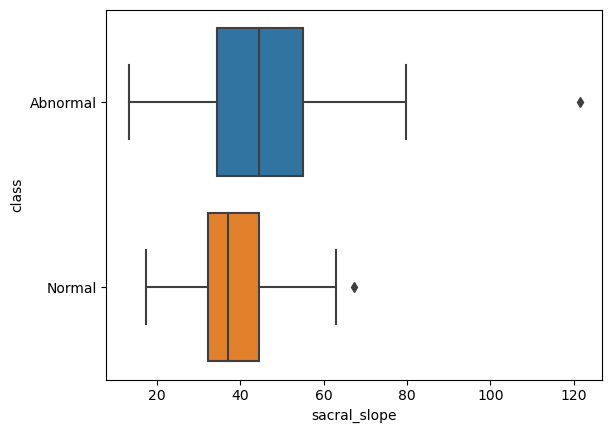

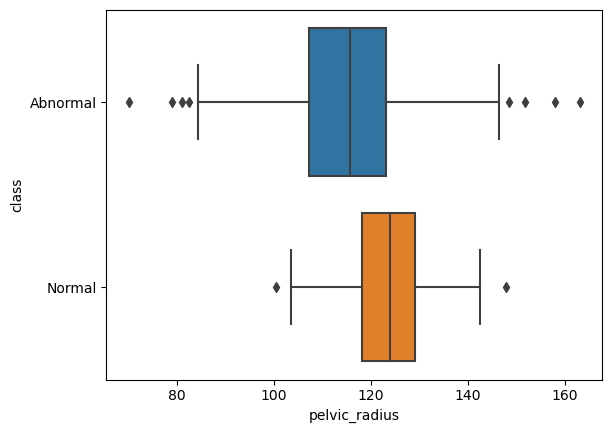

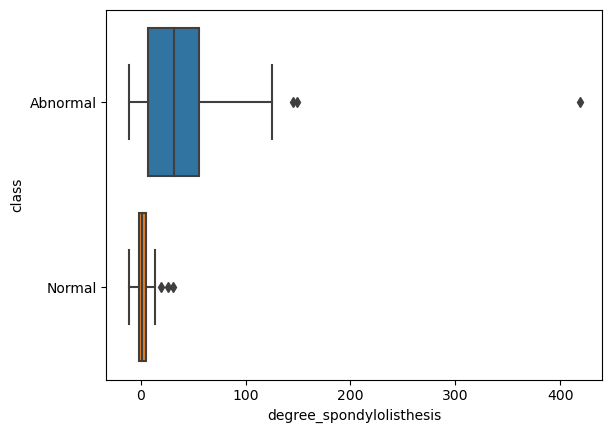

In [4]:
bp1 = sb.boxplot(data=df, x="pelvic_incidence", y="class")
plt.show(bp1)

bp2 = sb.boxplot(data=df, x="pelvic_tilt", y="class")
plt.show(bp2)

bp3 = sb.boxplot(data=df, x="lumbar_lordosis_angle", y="class")
plt.show(bp3)

bp4 = sb.boxplot(data=df, x="sacral_slope", y="class")
plt.show(bp4)

bp5 = sb.boxplot(data=df, x="pelvic_radius", y="class")
plt.show(bp5)

bp6 = sb.boxplot(data=df, x="degree_spondylolisthesis", y="class")
plt.show(bp6)

#### iii. Split Data Set

In [5]:
class0 = []
y_class0 = []
class1 = []
y_class1 = []

X_train = []
Y_train = []
X_test = []
Y_test = []

for row in df.iterrows():
    trainRow = [row[1]['pelvic_incidence'], row[1]['pelvic_tilt'], row[1]['lumbar_lordosis_angle'], row[1]['sacral_slope'], row[1]['pelvic_radius'], row[1]['degree_spondylolisthesis']]
    
    if row[1]["class"] == 'Normal':
        if len(class0) < 70:
            class0.append(trainRow)
            y_class0.append(0)
        else:
            X_test.append(trainRow)
            Y_test.append(0)
    
    elif row[1]["class"] == 'Abnormal':
        if len(class1) < 140:
            class1.append(trainRow)
            y_class1.append(1)
        else:
            X_test.append(trainRow)
            Y_test.append(1)
            
X_train = class0 + class1
Y_train = y_class0 + y_class1

print("Number of Samples in Train dataset: " + str(len(X_train)))
print("Number of Samples in Test dataset: " + str(len(X_test)))


Number of Samples in Train dataset: 210
Number of Samples in Test dataset: 100


### (c) Classification

#### i. Euclidean Metric

In [6]:
model = knn(n_neighbors=3, p=2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

#### ii. Test Data

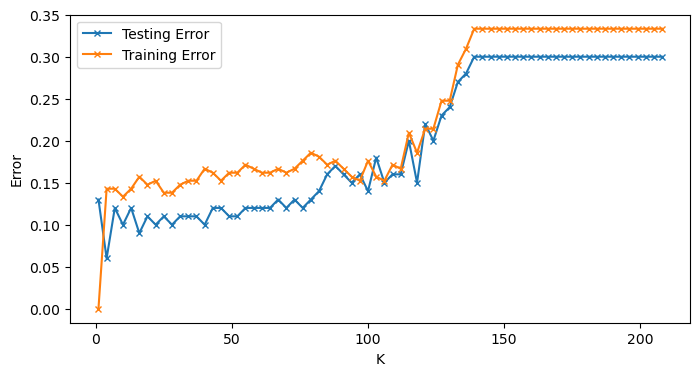

Optimal k is: 4
Least Test Error(rate) for k=4: 0.06


In [7]:
k_values, train_error, test_error = [], [], []

minVal, optK = float('inf'), 1

#loop for values of k
for k in range(208, 0, -3):
    
    k_values.append(k)
    
    model = knn(n_neighbors=k, p=2)
    model.fit(X_train, Y_train)

    #Test Error
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    test_error.append(testError)
    
    if testError < minVal:
        minVal = testError
        optK = k

    #Train Error
    Y_predict_train = model.predict(X_train)

    nCorrect = 0
    nTotal = len(Y_predict_train)
    for i in range(nTotal):
        if Y_predict_train[i] == Y_train[i]:
            nCorrect += 1

    trainError = 1-(nCorrect/nTotal)
    train_error.append(trainError)

plt.figure(figsize=(8,4))
plt.plot(k_values, test_error, marker='x', markersize=5, label="Testing Error")
plt.plot(k_values, train_error, marker='x', markersize=5, label="Training Error")
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Error")
plt.gca().legend()
plt.show()
    
print("Optimal k is: " + str(optK))
print("Least Test Error(rate) for k=" + str(optK) + ": " + str(round(minVal,2)))

Confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = 4


In [8]:
bestK = 4
model = knn(n_neighbors=bestK, p=2)
model.fit(X_train, Y_train)

Y_predict_test = model.predict(X_test)
confMatrix = confusion_matrix(Y_test, Y_predict_test)

tn, fp, fn, tp = confMatrix.ravel()

TPR = tp/(tp+fn)
TNR = tn/(tn+fp)

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix: " + str(confMatrix))
print("True Positive: " + str(round(tp,2)))
print("False Positive: " + str(round(fp,2)))
print("True Negative: " + str(round(tn,2)))
print("False Negative: " + str(round(fn,2)))
print()
print("True Positive Rate: " + str(round(TPR,2)))
print("True Negative Rate: " + str(round(TNR,2)))
print("Precision: " + str(round(precision,2)))
print("Recall: " + str(round(recall,2)))
print("F1-score: " + str(round(f1_score,2)))

Confusion Matrix: [[25  5]
 [ 1 69]]
True Positive: 69
False Positive: 5
True Negative: 25
False Negative: 1

True Positive Rate: 0.99
True Negative Rate: 0.83
Precision: 0.93
Recall: 0.99
F1-score: 0.96


#### iii. Learning Curve

Training Set size: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]
Corresponding best k: [1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]


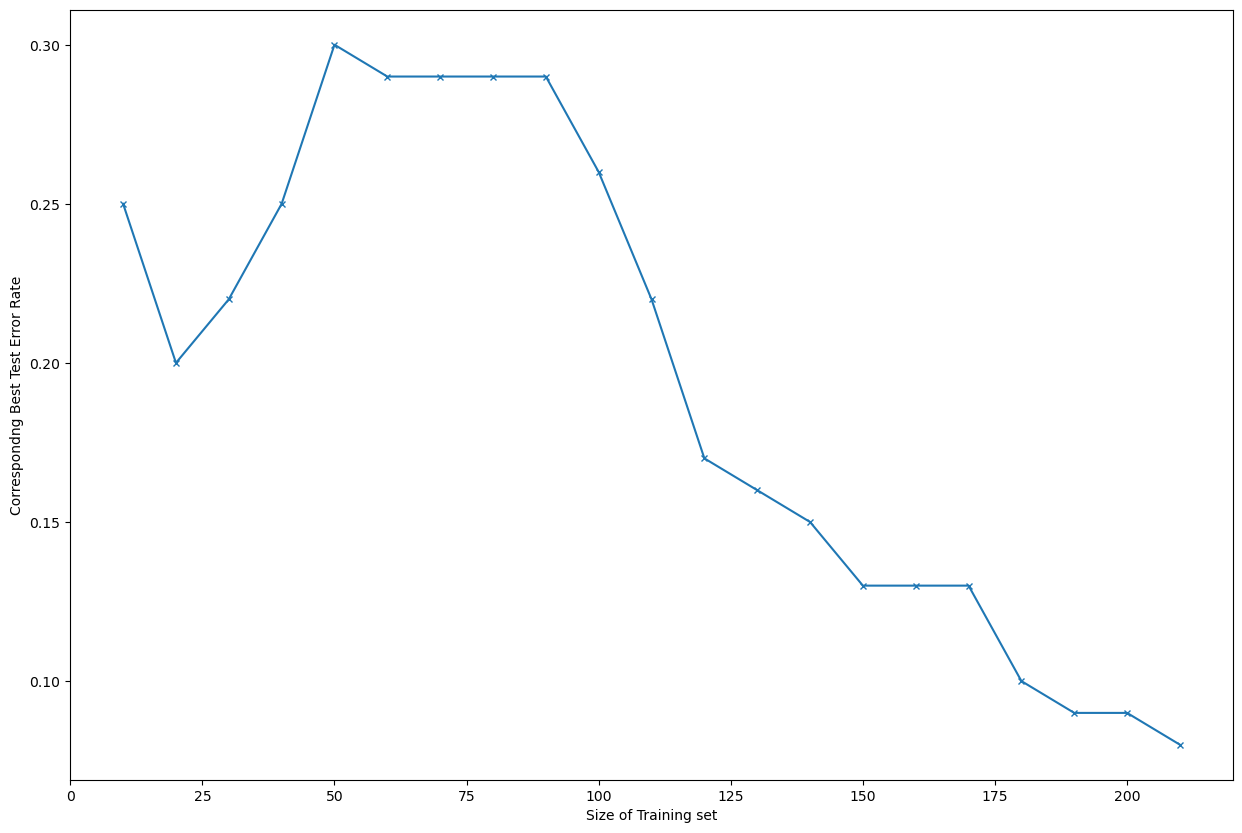

In [9]:
sizeOfTrainingSet = []
optimalK = []
bestTestErrorRate = []

for N in range(10, 211, 10):
    trainX = class0[:N//3] + class1[:(N-N//3)]
    trainY = y_class0[:N//3] + y_class1[:(N-N//3)]
    
    minVal = float('inf')
    optK = 1
    
    for k in range(1, N+1, 5):
    
        model = knn(n_neighbors=k, p=2)
        model.fit(trainX, trainY)

        #Test Error Rate
        Y_predict_test = model.predict(X_test)

        nCorrect = 0
        nTotal = len(Y_predict_test)
        for i in range(nTotal):
            if Y_predict_test[i] == Y_test[i]:
                nCorrect += 1

        testError = 1-(nCorrect/nTotal)
        
        if testError < minVal:
            minVal = testError
            optK = k
        
        
    sizeOfTrainingSet.append(N)
    optimalK.append(optK)
    bestTestErrorRate.append(minVal)
    


print("Training Set size: " + str(sizeOfTrainingSet))
print("Corresponding best k: " + str(optimalK))

plt.figure(figsize=(15,10))
plt.plot(sizeOfTrainingSet, bestTestErrorRate, marker='x', markersize=5)
plt.gca().set_xlabel("Size of Training set")
plt.gca().set_ylabel("Correspondng Best Test Error Rate")
plt.show()


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [10]:
M= {}

minVal = float('inf')
optK = 1

for k in range(1, 197, 5):
    model = knn(n_neighbors=k, p=1)
    model.fit(X_train, Y_train)
    
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    
    #k=1 and k=6 both give sma error but choosing 6 as k=1 is not a good idea
    if testError < minVal and k != 1:
        minVal = testError
        optK = k
        
print("MANHATTAN")
print("Best k: " + str(optK))
print("Test error for k=" + str(optK) + ": " + str(round(minVal,2)))

M['MANHATTAN'] = "Best k is " + str(optK) + ", and the corresponding test error is " + str(round(minVal,2))

MANHATTAN
Best k: 6
Test error for k=6: 0.11


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [11]:
log_p = 0.1
log_p = round(log_p,1)
best_p = 0.1

optK = 6
minVal = float('inf')

while log_p <= 1:
    p = math.pow(10, log_p)
    model = knn(n_neighbors = optK, p = p)
    model.fit(X_train, Y_train)
    
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    
    if testError < minVal:
        minVal = testError
        best_p = log_p
    
    log_p += 0.1
    log_p = round(log_p,1)

print("LOG P")
print("For k=6, Best log p: " + str(best_p))
print("Test error for best log P: " + str(round(minVal,2)))

M['LOG_P'] = "For k=" + str(optK) + ", the corresponding best log10p is " + str(round(best_p,2))

LOG P
For k=6, Best log p: 0.6
Test error for best log P: 0.06


##### C. Chebyshev Distance With p -> infinity.

In [12]:
minVal = float('inf')
optK = 1

for k in range(1, 197, 5):
    model = knn(n_neighbors = k, metric="chebyshev")
    model.fit(X_train, Y_train)
    
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    
    #k=1 and k=6 both give sma error but choosing 6 as k=1 is not a good idea
    if testError < minVal and k != 1:
        minVal = testError
        optK = k
        
print("CHEBYSHEV")
print("Best k: " + str(optK))
print("Test error for k=" + str(optK) + ": " + str(round(minVal,2)))

M['CHEBYSHEV'] = "Best k is " + str(optK) + ", and the corresponding test error is " + str(round(minVal,2))

CHEBYSHEV
Best k: 16
Test error for k=16: 0.08


#### ii. Mahalanobis Distance.

In [13]:
minVal = float('inf')
optK = 1

xTrain = np.array(X_train)

options = {"VI": np.linalg.pinv(np.cov(xTrain, rowvar=False))}

for k in range(1, 197, 5):
    
    model = knn(n_neighbors = k, p=2, metric="mahalanobis", metric_params=options)
    model.fit(X_train, Y_train)
    
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    
    #k=1 and k=6 both give same error but choosing 6 as k=1 is not a good idea
    if testError < minVal and k != 1:
        minVal = testError
        optK = k
        
print("MAHALANOBIS")
print("Best k: " + str(optK))
print("Test error for k=" + str(optK) + ": " + str(round(minVal,2)))

M['MAHALANOBIS'] = "Best k is " + str(optK) + ", and the corresponding test error is " + str(round(minVal,2))

MAHALANOBIS
Best k: 6
Test error for k=6: 0.16


Table of all 4 questions

In [14]:
M

{'MANHATTAN': 'Best k is 6, and the corresponding test error is 0.11',
 'LOG_P': 'For k=6, the corresponding best log10p is 0.6',
 'CHEBYSHEV': 'Best k is 16, and the corresponding test error is 0.08',
 'MAHALANOBIS': 'Best k is 6, and the corresponding test error is 0.16'}

### (e) Weighted Decision

EUCLIDEAN
Optimal k for weighted decision is: 6
Best Test error: 0.1


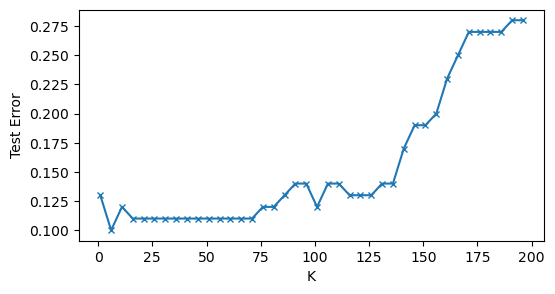

In [15]:
minVal = float('inf')
optK = 1
test_error = []
k_values = []

for k in range(1, 197, 5):
    model = knn(n_neighbors=k, weights="distance",  p=2)
    model.fit(X_train, Y_train)
    
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    
    if testError < minVal:
        minVal = testError
        optK = k
        
    test_error.append(testError)
    k_values.append(k)
    
print("EUCLIDEAN")
print("Optimal k for weighted decision is: " + str(optK))
print("Best Test error: " + str(round(minVal,2)))

plt.figure(figsize=(6,3))
plt.plot(k_values, test_error, marker='x', markersize=5)
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Test Error")
plt.show()

MANHATTAN
Optimal k for weighted decision is: 26
Best Test error: 0.1


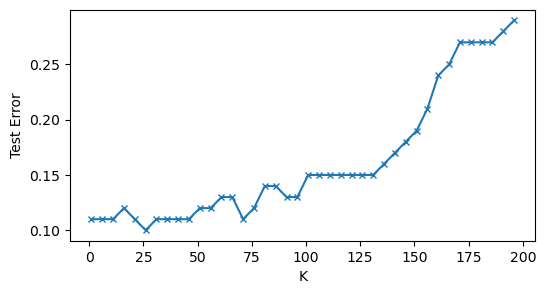

In [16]:
minVal = float('inf')
optK = 1
test_error = []
k_values = []

for k in range(1, 197, 5):
    model = knn(n_neighbors=k, weights="distance",  p=1)
    model.fit(X_train, Y_train)
    
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    
    if testError < minVal:
        minVal = testError
        optK = k
        
    test_error.append(testError)
    k_values.append(k)
        
print("MANHATTAN")
print("Optimal k for weighted decision is: " + str(optK))
print("Best Test error: " + str(round(minVal,2)))

plt.figure(figsize=(6,3))
plt.plot(k_values, test_error, marker='x', markersize=5)
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Test Error")
plt.show()

CHEBYSHEV
Optimal k for weighted decision is: 16
Best Test error: 0.11


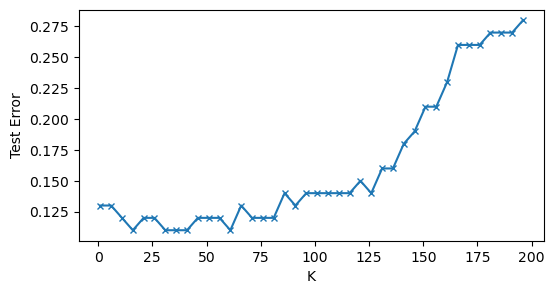

In [17]:
minVal = float('inf')
optK = 1
test_error = []
k_values = []

for k in range(1, 197, 5):
    model = knn(n_neighbors=k, weights="distance", metric="chebyshev")
    model.fit(X_train, Y_train)
    
    Y_predict_test = model.predict(X_test)

    nCorrect = 0
    nTotal = len(Y_predict_test)
    for i in range(nTotal):
        if Y_predict_test[i] == Y_test[i]:
            nCorrect += 1

    testError = 1-(nCorrect/nTotal)
    
    if testError < minVal:
        minVal = testError
        optK = k
        
    test_error.append(testError)
    k_values.append(k)

print("CHEBYSHEV")
print("Optimal k for weighted decision is: " + str(optK))
print("Best Test error: " + str(round(minVal,2)))

plt.figure(figsize=(6,3))
plt.plot(k_values, test_error, marker='x', markersize=5)
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Test Error")
plt.show()

### (f) Training Error Rate

Lowest Training error rate was 0. This happened when k=1 for training dataset as all points had only 1 neighbor and it was themselves. So, all predictions matched the true results